# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



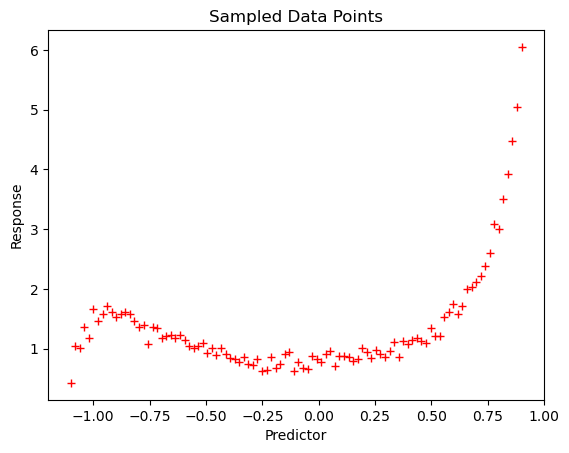

In [165]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

[0.55452131]
[1.41661036]


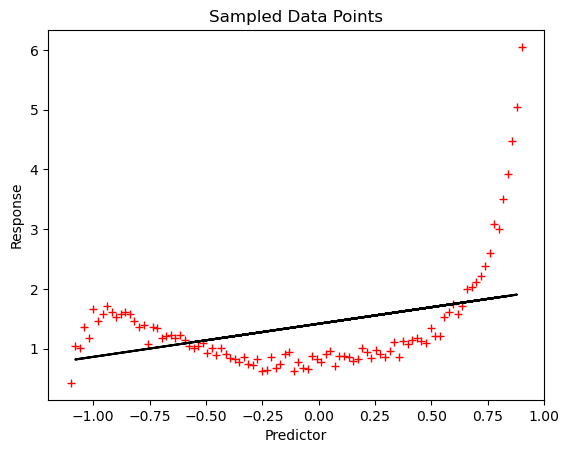

R2 Score: 0.27222953789593096


In [166]:
# your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Reshape predictor for sklearn compatibility
X = predictor.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, response, test_size=0.2, random_state=1234)

class Scratch_LR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        # Calculate slope and intercept
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        #print(X_test)
        
        return self.m * X_test + self.b

lr = Scratch_LR()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.plot(X_test,predictions,color='black')
plt.title('Sampled Data Points')
plt.show()

# Calculate R2 score
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

In [167]:
# Polynomial Regression class using OLS(Ordinary Least Squares)
class poly_LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self, X_test):
        return X_test @ self.coef_ + self.intercept_
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

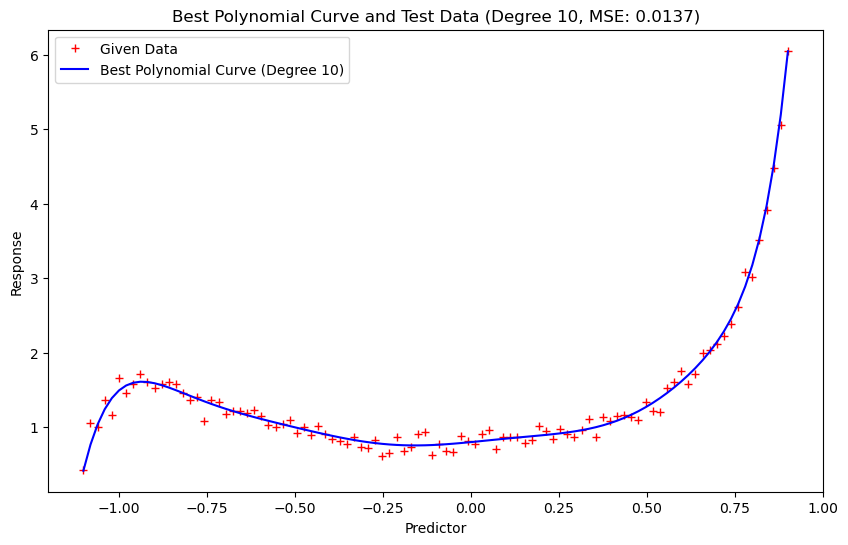

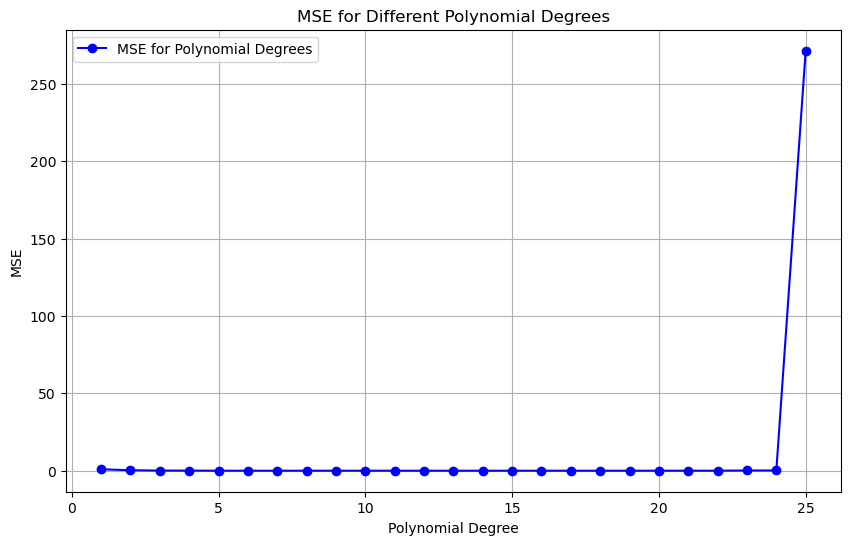

In [168]:
# Initialize the list to store MSE values
mse_values = []

# Loop over degrees from 1 to 25
for degree in range(1, 26):
    
    # Create polynomial features for the current degree
    X_poly_train = np.column_stack([X_train[:, 0]**i for i in range(1, degree + 1)])
    X_poly_test = np.column_stack([X_test[:, 0]**i for i in range(1, degree + 1)])

    # Fit the model
    model = poly_LR()
    model.fit(X_poly_train, y_train)

    # Make predictions and calculate MSE
    y_pred = model.predict(X_poly_test)
    mse_value = model.mse(y_test, y_pred)
    mse_values.append(mse_value)
    #print(mse_value)

# Find the best degree
best_degree = np.argmin(mse_values) + 1  # Adding 1 because degrees start from 1
best_mse = mse_values[best_degree - 1]

# Create polynomial features for the best degree
X_poly_best_train = np.column_stack([X_train[:, 0]**i for i in range(1, best_degree + 1)])
X_poly_best = np.column_stack([X[:, 0]**i for i in range(1, best_degree + 1)])

# Fit the model with the best degree
best_model = poly_LR()
best_model.fit(X_poly_best_train, y_train)

# Predict using the best model
y_pred_best = best_model.predict(X_poly_best)

# Plot the best polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(predictor, response, 'r+', label='Given Data')
plt.plot(predictor, y_pred_best, 'b-', label=f'Best Polynomial Curve (Degree {best_degree})')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title(f'Best Polynomial Curve and Test Data (Degree {best_degree}, MSE: {best_mse:.4f})')
plt.legend()
plt.show()

# Plot MSE values obtained for each degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, 26), mse_values, 'bo-', label='MSE for Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE for Different Polynomial Degrees')
plt.grid(True)
plt.legend()
plt.show()

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

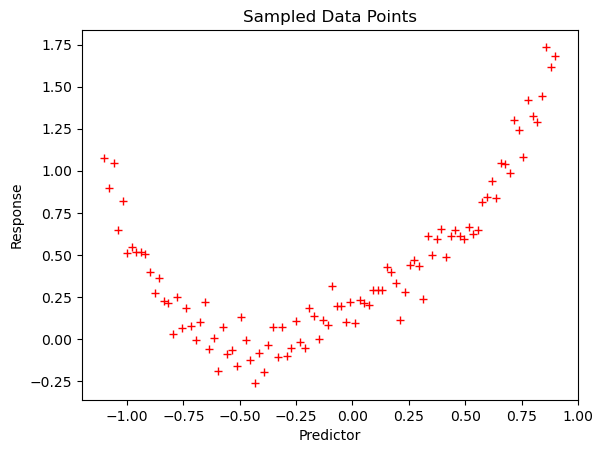

In [169]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [170]:
# Multiple Regression class using OLS(Ordinary Least Squares)
class poly_LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self, X_test):
        return X_test @ self.coef_ + self.intercept_
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

In [171]:
# Initialize the list to store MSE values
mse_values = []

# Loop over degrees from 1 to 25
for degree in range(1, 8):
    
    # Create polynomial features for the current degree
    X_poly_train = np.column_stack([X_train[:, 0]**i for i in range(1, degree + 1)])
    X_poly_test = np.column_stack([X_test[:, 0]**i for i in range(1, degree + 1)])

    # Instantiate and fit the model
    model = poly_LR()
    model.fit(X_poly_train, y_train)

    # Make predictions and calculate MSE
    y_pred = model.predict(X_poly_test)
    mse_value = model.mse(y_test, y_pred)
    mse_values.append(mse_value)
    #print(mse_value)

# Find the best degree
best_degree = np.argmin(mse_values) + 1  # Adding 1 because degrees start from 1
best_mse = mse_values[best_degree - 1]
print(best_degree)
print(best_mse)

# Create polynomial features for the best degree
X_poly_best_train = np.column_stack([X_train[:, 0]**i for i in range(1, best_degree + 1)])
X_poly_best = np.column_stack([X[:, 0]**i for i in range(1, best_degree + 1)])

# Fit the model with the best degree
best_model = poly_LR()
best_model.fit(X_poly_best_train, y_train)

# Predict using the best model
y_pred_best = best_model.predict(X_poly_best)

7
0.02050385360591869


In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(predictor_low.reshape(-1, 1))

class ScratchRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None
        
    def fit(self, x_train, y_train):
        
        # Add a column of ones for the intercept
        x_train_ = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
        I = np.identity(x_train_.shape[1])
        betas = np.linalg.inv(x_train_.T.dot(x_train_) + self.alpha * I).dot(x_train_.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, x_test):
        y_pred = np.dot(x_test, self.coef_) + self.intercept_
        return y_pred

 # Fit the Model
model = ScratchRidge(alpha = 0.1)
model.fit(X_poly[:,1:], response_low)  # Exclude the bias term from X_poly

# Make predictions
y_pred_new = model.predict(X_poly[:,1:])  # Exclude the bias term

# Calculate Mean Squared Error
mse_ridge = mean_squared_error(response_low, y_pred_new)
print(f"Mean Squared Error: {mse_ridge}")   
    

Mean Squared Error: 0.009161868937838236


In [173]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Lasso regression function
def lasso_regression(X, y, alpha, epochs, lr=0.01):
    m, n = X.shape
    theta = np.random.rand(n)
    for _ in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m + alpha * np.sign(theta)
        theta -= lr * gradient
    return theta

# Scaling and splitting data
X_train, X_test, Y_train, Y_test = train_test_split(predictor_low.reshape(-1, 1), response_low, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Polynomial features for best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lasso regression parameters
alpha = 0.1
epochs = 1000
learning_rate = 0.01

# Perform Lasso regression
lasso_theta = lasso_regression(X_train_poly, Y_train, alpha, epochs, learning_rate)

# Predictions and MSE
predictions = X_test_poly.dot(lasso_theta)
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.05589059803117964


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [174]:
import numpy as np
import pandas as pd

credits = pd.read_csv('credit.csv')
credits.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [175]:
# Define the class
class POLY_LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self, X_test):
        return X_test @ self.coef_ + self.intercept_
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

# Prepare the data for the initial model
X = credits.drop('Balance', axis=1).values

# Select target variable
y = credits['Balance'].values

# Function to train the model and calculate MSE
def train_and_evaluate(X, y):
    model = POLY_LR()
    model.fit(X, y)
    y_pred = model.predict(X)
    return model.mse(y, y_pred)

# Train the initial model and calculate MSE
initial_model_mse = train_and_evaluate(X, y)
print("MSE with all predictors:", initial_model_mse)

# Iteratively remove each predictor and calculate MSE
mse_results = {}
predictors = credits.columns[:-1]  # exclude the response variable (Balance)

for predictor in predictors:
    
    # Drop one predictor
    X_temp = credits.drop([predictor, 'Balance'], axis=1).values
    
    # Train the model and calculate MSE
    mse_temp = train_and_evaluate(X_temp, y)
    mse_results[predictor] = mse_temp

    # Print the results for each removal
    print(f"MSE without '{predictor}':", mse_temp)

# Compare the model using all predictors
mse_results["All Predictors"] = initial_model_mse

# Final comparison
print("\nFinal MSE comparison:")
print(mse_results)

MSE with all predictors: 25671.953118252037
MSE without 'Income': 51193.96493809609
MSE without 'Limit': 26039.765278276744
MSE without 'Rating': 26112.69762348379
MSE without 'Cards': 25847.711852722266
MSE without 'Age': 25899.554342697942
MSE without 'Education': 25710.545805755486

Final MSE comparison:
{'Income': 51193.96493809609, 'Limit': 26039.765278276744, 'Rating': 26112.69762348379, 'Cards': 25847.711852722266, 'Age': 25899.554342697942, 'Education': 25710.545805755486, 'All Predictors': 25671.953118252037}


In [176]:
# import numpy as np
# import pandas as pd
from sklearn.metrics import r2_score

# Define the class
class POLY_LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self, X_test):
        return X_test @ self.coef_ + self.intercept_
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

# Merging the two columns
credits['Rating_Age'] = credits['Rating'] + credits['Age']

# Remove 'Rating' and 'Age' columns
credits = credits.drop(['Rating', 'Age'], axis=1)

interaction = POLY_LR()

# Selecting columns and converting them to numpy arrays
X_train = credits[['Income', 'Limit', 'Cards', 'Education', 'Rating_Age']].values
y_train = credits['Balance'].values

# Fit the model
interaction.fit(X_train, y_train)

# Predict
y_pred = interaction.predict(X_train)

# Calculate R2 Score
r2 = r2_score(y_train, y_pred)
print(f'R2 Score: {r2}')

# Calculate MSE
mse = interaction.mse(y_train, y_pred)
print(f'MSE: {mse}')

R2 Score: 0.8751000065576542
MSE: 26335.136111217562


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [177]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [178]:
# Define the class
class Poly_LR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self, X_test):
        return X_test @ self.coef_ + self.intercept_
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

# Prepare the data for Model 1 (with IceCreamSales)
X_full = sharks.drop('SharkAttacks', axis=1).values
y = sharks['SharkAttacks'].values

# Train Model 1
model_full = Poly_LR()
model_full.fit(X_full, y)

# Predict and calculate MSE for Model 1
y_pred_full = model_full.predict(X_full)
mse_full = model_full.mse(y, y_pred_full)

# Prepare the data for Model 2 (without IceCreamSales)
X_reduced = sharks.drop(['SharkAttacks', 'IceCreamSales'], axis=1).values

# Train Model 2
model_reduced = Poly_LR()
model_reduced.fit(X_reduced, y)

# Predict and calculate MSE for Model 2
y_pred_reduced = model_reduced.predict(X_reduced)
mse_reduced = model_reduced.mse(y, y_pred_reduced)

print(mse_full, mse_reduced)

# Calculate R2 using scikit-learn for both models
r2_full_sklearn = r2_score(y, y_pred_full)
r2_reduced_sklearn = r2_score(y, y_pred_reduced)

print(r2_full_sklearn, r2_reduced_sklearn)

30.28665995513912 33.54214905935011
0.5692381584436699 0.5229359090779869
